<a href="https://colab.research.google.com/github/Mohammadbk93/projects/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In [2]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

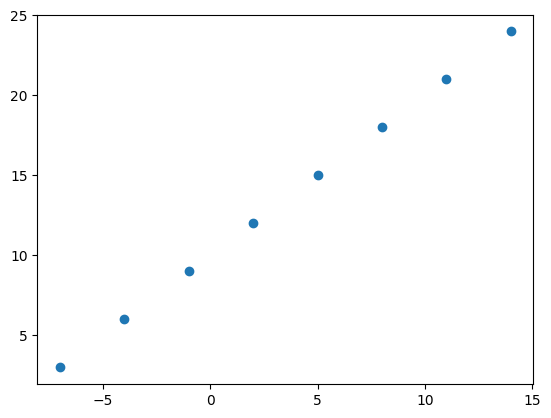

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize data
plt.scatter(X,y)


## Input and output shape

In [4]:
# create a demo for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# turn our numpy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

* Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [6]:
# set the random seed
tf.random.set_seed(42)

#1.Creating a model using a Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])


#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=("mae"))      #model.compile(optimizer='sgd', loss='mse')

# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.3021 - mae: 11.3021
Epoch 2/5
1/1 [==============================] - 0s 35ms/step - loss: 11.1696 - mae: 11.1696
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.0371 - mae: 11.0371
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 10.9046 - mae: 10.9046
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.7721 - mae: 10.7721


In [7]:
# Tray an make prediction with our model
model.predict([17.0])

1/1 [==============================] - 0s 231ms/step


array([[13.700535]], dtype=float32)

## Improving our model

In [8]:
# set the random seed
tf.random.set_seed(42)

#1.Creating a model using a Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(1)
    ])


#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.001),
              metrics=("mae"))      #model.compile(optimizer='sgd', loss='mse')

# 3.Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.1389 - mae: 13.1389
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7735 - mae: 12.7735
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.4253 - mae: 12.4253
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.0751 - mae: 12.0751
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 11.7197 - mae: 11.7197
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 11.3558 - mae: 11.3558
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9821 - mae: 10.9821
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.7162 - mae: 10.7162
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4432 - mae: 10.4432
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 10.1586 - mae: 10.1586
Epoch 11/100
1/1 [==============================] -

## Evaluating model

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* The data - what data are you working with? What does it look like?
* The model itself - what does the architecture look like? What are the different shapes?
* The training of a model - how does a model perform while it learns?
*The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [9]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [10]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

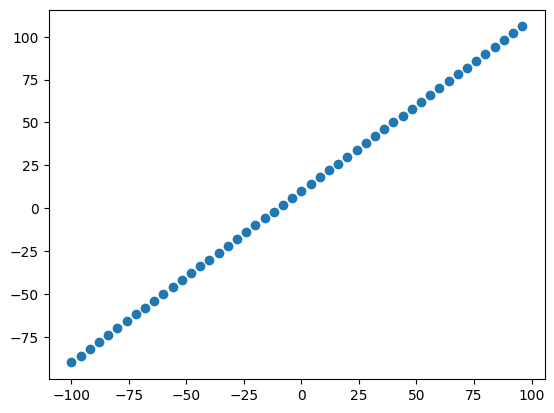

In [11]:
# visualize date
import matplotlib.pyplot as plt

plt.scatter(X, y)

## Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* **Training set** **bold text** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [12]:
# check the lengh of how many samole we have
len(X)

50

In [13]:
# split the data into train and test sets
X_train = X[:40]   # first 40 are training samples (this is 80% of data)
y_train = y[:40]

X_test =  X[40:]    # next 10 are test samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing data

Now we have got our new data ( train set and test set)

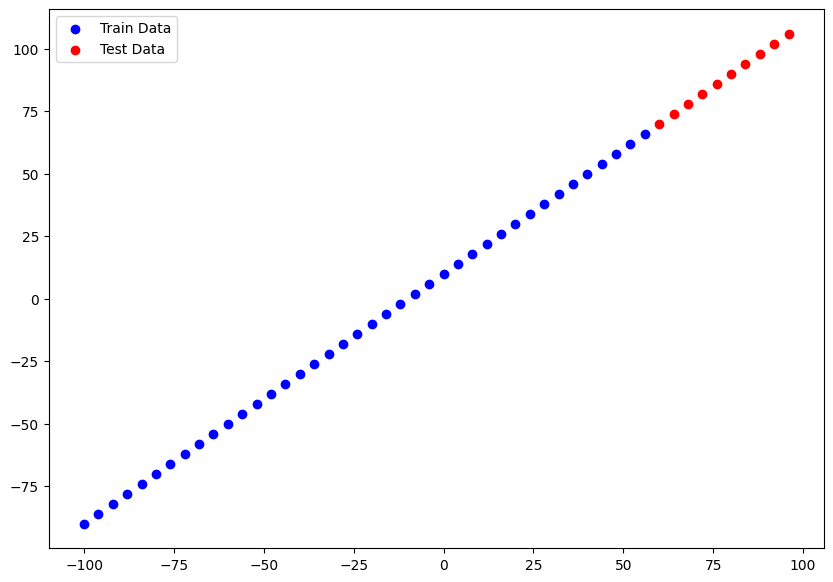

In [14]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Train Data")

# plot test set in red
plt.scatter(X_test, y_test, c="r", label="Test Data")

plt.legend()

In [15]:
# Create a model which builds automatically by defining the input shape
tf.random.set_seed(42)

# 2.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape = [1])
])

# 2.Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

# 3.Fit the model to the training data model
model.fit(X_train, y_train, epochs=100, verbose=1) # verbose controls how much gets output


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 22ms/step - loss: 16.4785 - mae: 16.4785
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 10.4355 - mae: 10.4355
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 8.5944 - mae: 8.5944
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4735 - mae: 8.4735
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 7.8445 - mae: 7.8445
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 7.7767 - mae

Alongside summary, you can also view a 2D plot of the model using
plot_model().





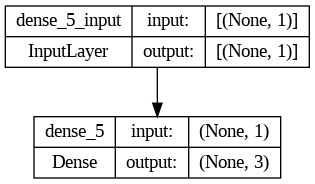

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes= True)

In [17]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 81ms/step


In [18]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [19]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

ValueError: x and y must be the same size

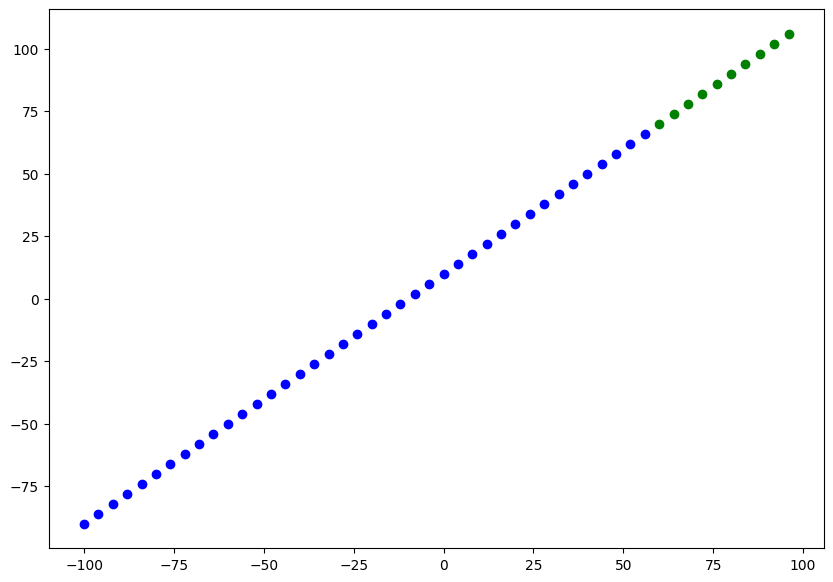

In [20]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)


## Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors)

In [ ]:
# Evaluste the model on test data
model.evaluate(X_test, y_test)

In [ ]:
 # Calculate the MAE
 tf.keras.losses.MAE(y_true=y_test,
                     y_pred=tf.squeeze(y_preds))


In [ ]:
 # Calculate the MSE
 tf.keras.losses.MSE(y_true=y_test,
                     y_pred=tf.squeeze(y_preds))


 it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.keras.losses.MAE(y_test, y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.keras.losses.MSE(y_test, y_pred)

### Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

* Get more data - get more examples for your model to train on (more opportunities to learn patterns).
* Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* Train for longer - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.


**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

**Build model_2**

2 layers, trained for 100 epochs.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

**A larger Example**

### Insurance model

In [21]:
# import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/fzehracetin/regression-with-knn/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### One-Hot encode, use dummies

Since we have columns with different formats (Objects, int and etc...) we have to one_hot encode them to feed them in ML.
In this case we use **dummies**.

dummies allow us to transform categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction.

In [23]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [24]:
insurance_one_hot_int = insurance_one_hot.astype(int)
insurance_one_hot_int

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [25]:
# Showing the types of data
insurance_one_hot_int.dtypes

age                 int64
bmi                 int64
children            int64
charges             int64
sex_female          int64
sex_male            int64
smoker_no           int64
smoker_yes          int64
region_northeast    int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object

In [26]:
# create X , y valies ( features and labels)
X = insurance_one_hot_int.drop("charges", axis=1)
y = insurance_one_hot_int["charges"]

In [27]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [28]:
# view y
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

In [29]:
# creating train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
# view the lenght
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [31]:
# Build a neural network
tf.random.set_seed(42)

# 1.crrate a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8758.4336 - mae: 8758.4336
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7859.6606 - mae: 7859.6606
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7556.7490 - mae: 7556.7490
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.7637 - mae: 7884.7637
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7635.1050 - mae: 7635.1050
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7585.3159 - mae: 7585.3159
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.5527 - mae: 7573.5527
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7794.5015 - mae: 7794.5015
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7601.6416 - mae: 7601.6416
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7665.5225 - mae: 7665.5225

In [32]:
# check the insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8479.9131 - mae: 8479.9131


[8479.9130859375, 8479.9130859375]

In the compile model and more precise in Optimizer part we first go ahead with SGD() but after I tried it, I faced **nan nan** when i fit the mdoel.
So, i tried to fix this problem with changing **SGD ==> Adam** optimizer and it showed a good result

In [33]:
# improving our model becuase it wasn't performed well

# set random set seed
tf.random.set_seed(42)

# 1.Build new model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics= ["mae"])
#3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13266.3447 - mae: 13266.3447
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13091.4131 - mae: 13091.4131
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12721.1299 - mae: 12721.1299
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12009.3672 - mae: 12009.3672
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10853.8135 - mae: 10853.8135
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9421.2041 - mae: 9421.2041
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8139.4927 - mae: 8139.4927
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7533.6807 - mae: 7533.6807
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7433.9375 - mae: 7433.9375
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7413.0527 - mae:

In [34]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4777.5571 - mae: 4777.5571


[4777.55712890625, 4777.55712890625]

In [35]:
# Evaluate the previous model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8479.9131 - mae: 8479.9131


[8479.9130859375, 8479.9130859375]

In [36]:
# Evaluate the larger model
evaluation_2 = insurance_model_2.evaluate(X_test, y_test)

# Evaluate the previous model
evaluation_1 = insurance_model.evaluate(X_test, y_test)

# Extract the MAE values
mae_2 = evaluation_2[1]
mae_1 = evaluation_1[1]

# Calculate the percentage improvement
percentage_improvement = ((mae_1 - mae_2) / mae_1) * 100

print("You have got %", percentage_improvement, "improvemnt")


9/9 [==============================] - 0s 2ms/step - loss: 8479.9131 - mae: 8479.9131
You have got % 43.66030547142022 improvemnt


In [37]:
# create model 3

# improving our model becuase it wasn't performed well

# set random set seed
tf.random.set_seed(42)

# 1.Build new model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2.compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics= ["mae"])
#3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13297.4375 - mae: 13297.4375
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13170.9072 - mae: 13170.9072
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12904.6064 - mae: 12904.6064
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12365.6055 - mae: 12365.6055
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11407.4990 - mae: 11407.4990
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 10029.2480 - mae: 10029.2480
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8578.1006 - mae: 8578.1006
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7653.7285 - mae: 7653.7285
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7431.5610 - mae: 7431.5610
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7405.4688 - ma

In [38]:
# evalate the model 3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3507.6411 - mae: 3507.6411


[3507.64111328125, 3507.64111328125]

In [39]:
# Compare model 2 and model 3

evaluation_3 = insurance_model_3.evaluate(X_test, y_test)

# Evaluate the previous model
evaluation_2 = insurance_model_2.evaluate(X_test, y_test)

# Extract the MAE values
mae_2 = evaluation_3[1]
mae_1 = evaluation_2[1]

# Calculate the percentage improvement
percentage_improvement = ((mae_1 - mae_2) / mae_1) * 100

print("You have got %", percentage_improvement, "improvemnt from model 2 ==> model 3")


9/9 [==============================] - 0s 2ms/step - loss: 4777.5571 - mae: 4777.5571
You have got % 26.580865102407014 improvemnt from model 2 ==> model 3


###The Loss Curve:
Tracking Model Performance Over Time


Text(0.5, 0, 'Epochs')

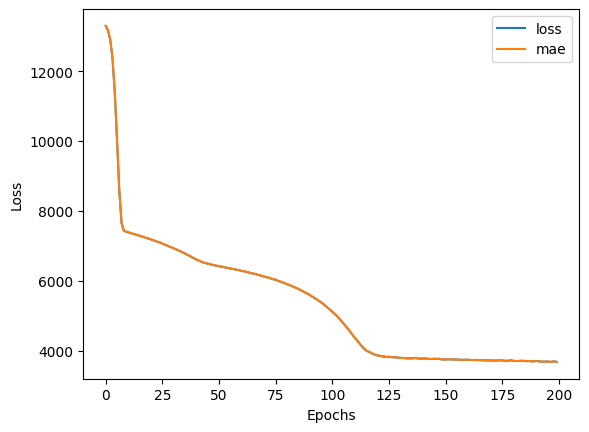

In [40]:
# plot history (known as a loss curve and or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")


## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.



1.   This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

2.   There is another process call **standardization** which converts all of your data to unit variance and 0 mean.


In [57]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [58]:
# read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/fzehracetin/regression-with-knn/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
* MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).

* OneHotEncoder - one hot encode the non-numerical columns.

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [63]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [61]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

In [64]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13342.9814 - mae: 13342.9814
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13332.8525 - mae: 13332.8525
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13308.2754 - mae: 13308.2754
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13257.9053 - mae: 13257.9053
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13170.4600 - mae: 13170.4600
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 13035.2461 - mae: 13035.2461
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12842.3652 - mae: 12842.3652
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12581.9316 - mae: 12581.9316
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12243.9189 - mae: 12243.9189
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 11827.32

In [68]:
# Evaulate 3rd model
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3169.2114 - mae: 3169.2114


[3169.21142578125, 3169.21142578125]